## Problem 1

The loss function or reconstruction error for each element of a sample X is defined as follows: 

$$ l(f(x)) = -\big[\underbrace{x log(\widehat{x})}_{l_1} + \underbrace{(1-x)log(1-\widehat{x})}_{l_2}\big] $$
Note that the totoal recunstruction error for a sample X is the sum over all elemets.
$$ \widehat{a}(x) = c + W^*h(x) $$
$$ \sigma(\widehat{a}(x)) = \widehat{x} $$  

According to the lecture 8, slide6, the goal is to show: 
$$ \frac{\partial l(f(x))}{\partial \widehat{a}(x)} = \widehat{x} - x $$
I prove the above equation as follows:
$$ \frac{\partial l(f(x))}{\partial \widehat{a}(x)} = -\big[\frac{\partial l_1}{\partial \sigma} \mathbf{.} \frac{\partial \sigma}{\partial \widehat{a}(x)} + \frac{\partial l_2}{\partial \sigma} \mathbf{.} \frac{\partial \sigma}{\partial \widehat{a}(x)}\big] $$

$$ \frac{\partial l_1}{\partial \sigma} = \frac{x}{\sigma(\widehat{a}(x))} $$
$$ \frac{\partial l_2}{\partial \sigma} = \frac{x-1}{1-\sigma(\widehat{a}(x))} $$
$$ \frac{\partial \sigma}{\partial \widehat{a}(x)} = \sigma(\widehat{a}(x))(1-\sigma(\widehat{a}(x)) $$

Putting every part into the goal equation:
$$ \frac{\partial l(f(x))}{\partial \widehat{a}(x)} = -\big[\frac{x}{\sigma(\widehat{a}(x))}  \mathbf{.} \sigma(\widehat{a}(x))(1-\sigma(\widehat{a}(x)) + \frac{x-1}{1-\sigma(\widehat{a}(x))} \mathbf{.} \sigma(\widehat{a}(x))(1-\sigma(\widehat{a}(x))\big] $$

After canceling out the term and multiplying terms to each other:
$$ \frac{\partial l(f(x))}{\partial \widehat{a}(x)} = -\big[{x} \mathbf{.} (1-\sigma(\widehat{a}(x)) + {(x-1)} \mathbf{.} \sigma(\widehat{a}(x))\big] $$
$$ \frac{\partial l(f(x))}{\partial \widehat{a}(x)} = -\big[x - \sigma(\widehat{a}(x))(x) + (x)\sigma(\widehat{a}(x)) - \sigma(\widehat{a}(x))\big] $$
$$ \frac{\partial l(f(x))}{\partial \widehat{a}(x)} = \sigma(\widehat{a}(x)) - x = \widehat{x} - x  $$


# Problem 2
1. First the training dataset is constructed from MNIST. 
2. The autoencoder model is built. 
3. The avarage reconstruction error is computed for every value of N. 
3. I plot average reconsturction error per 100 iteration for every value of N. 
4. Average reconstruction error is the average of squared euclidean distance for samples in batch-size.
5. 25,000 iteration is used for training autoencoder. 
6. Precision, recall, F-score is reported for the 50 nearest image of first image. 
7. Cose similarity is used for computing the nearest image. 
8. The PCA model is built using sklearn. 
9. The reconstruction error per N, and precision and recall is computed for PCA. 
10. Instead of plotting for comparison, Just report the the minimum reconstruction error for both methods per N. 

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Reconstruction error for Autoencoder per each value of N




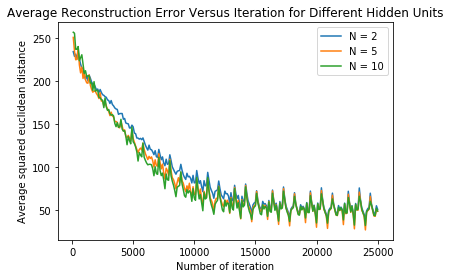

AutoEncoder: Reporting precision and recall corresponding to each digit per each value N
Precision, recall, F-score for each digit for N = 2
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        49
          6       0.00      0.00      0.00         1

avg / total       0.96      0.98      0.97        50

Precision, recall, F-score for each digit for N = 5
             precision    recall  f1-score   support

          0       0.02      1.00      0.04         1
          2       0.00      0.00      0.00         8
          3       0.00      0.00      0.00         8
          4       0.00      0.00      0.00         5
          5       0.00      0.00      0.00         6
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         7
          8       0.00      0.00      0.00         5
          9       0.00      0.00      0.00         7

avg / total       0.00      0.02      0.00        50

Precis

c:\users\sina\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Comparison Reconstruction error for Autoencoder and PCI per each value of N


Reconstruction error for N = 2: Autoencoder = 39.867218017578125, PCI = 43.97902297973633
Reconstruction error for N = 5: Autoencoder = 27.33432960510254, PCI = 34.775001525878906
Reconstruction error for N = 10: Autoencoder = 32.52231216430664, PCI = 26.64044761657715


PCI: Reporting precision and recall corresponding to each digit per each value N
Precision, recall, F-score for each digit for N = 2
             precision    recall  f1-score   support

          0       0.68      1.00      0.81        34
          2       0.00      0.00      0.00         2
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         1
          5       0.00      0.00      0.00         2
          6       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         7

avg / total       0.46      0.68      0.55        50

Precision, recall, F-score for each d

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import pickle
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
%matplotlib inline

#==========================================================================================
# Building the training dataset the same as requested in the homework.
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
batch = mnist.train.next_batch(100)
images = mnist.train.images
labels = mnist.train.labels
training_images = [[] for _ in range(10)]
training_labels = [[] for _ in range(10)]
counter = np.zeros((10, 1))
for i in range(len(images)):
    if min(counter) > 100:
        break
    digit = int(list(labels[i]).index(1))
    training_images[digit].append(images[i])
    training_labels[digit].append(labels[i])
    counter[digit, 0] = counter[digit, 0] + 1
for i in range(10):
    training_images[i] = training_images[i][:100]
    training_labels[i] = training_labels[i][:100]
del mnist

training_images = [image for set in training_images for image in set]
training_images = np.array(training_images)
training_labels = [label for set in training_labels for label in set]
training_labels = np.array(training_labels)
#==========================================================================================

# Building the encoder
A = 2
def encoder(x, num_hidden):
    # Encoder Hidden layer with sigmoid activation
    encoder_h = tf.Variable(tf.random_normal([num_input, num_hidden]))
    encoder_b = tf.Variable(tf.random_normal([num_hidden]))
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, encoder_h), encoder_b))
    return layer_1


# Building the decoder
def decoder(layer_1, num_hidden):
    # Decoder Hidden layer with sigmoid activation
    decoder_h = tf.Variable(tf.random_normal([num_hidden, num_input]))
    decoder_b = tf.Variable(tf.random_normal([num_input]))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, decoder_h), decoder_b))
    return layer_2


# Network Parameters
num_hidden_list = [2, 5, 10] # num of hidden units, chosen from [2, 5, 10]
num_input = 784  # MNIST data input (img shape: 28*28)

# Training Parameters
num_steps = 25000
batch_size = 32
display_step = 100
# Part (a) for AutoEncoder, Reconstruction error for each of the hidden unit per every 100 training iterations
error_AE = [[], [], []]

# Part (b) for AutoEncoder, label_prediction and true_label for every value of N.
true_pred_labels_AE = [[], [], []]

for k in range(len(num_hidden_list)):
    X = tf.placeholder(tf.float32, shape=[None, num_input])

    # Construct model
    encoder_part = encoder(X, num_hidden=num_hidden_list[k])
    decoder_part = decoder(encoder_part, num_hidden=num_hidden_list[k])

    # Prediction
    y_pred = decoder_part
    # Targets (Labels) are the input data.
    y_true = X

    # Define loss and optimizer, minimize the squared error, and train_step
    # Loss or reconstruction error is the average of squared euclidean distance for samples in batch-size
    loss = tf.reduce_mean(tf.reduce_sum(tf.pow(y_true - y_pred, 2), 1))
    optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)
    #==========================================================================================
    # Start Training for AE

    with tf.Session() as sess:
        # Run the initializer
        sess.run(tf.global_variables_initializer())

        # Training
        counter = 0
        for i in range(1, num_steps+1):
            # Prepare Data
            # Get the next batch of MNIST data (only images are needed, not labels)
            batch_x = training_images[counter: counter+batch_size]

            # Run optimization op (backprop) and cost op (to get loss value)
            optimizer.run(feed_dict={X: batch_x})
            loss_value = loss.eval(feed_dict={X: batch_x})
            # _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
            # Display logs per step
            if i % display_step == 0:
                #print('Step %i: Average of Minibatch Reconstruction Error: %f' % (i, loss_value))
                error_AE[k].append(loss_value)

            counter += batch_size
            if (counter + batch_size) > 1000:
                # Run optimization and get loss value)
                batch_x = training_images[counter:]
                optimizer.run(feed_dict={X: batch_x})
                loss_value = loss.eval(feed_dict={X: batch_x})
                counter = 0

        # Part (b): For each N, compute the predicted label for 50 nearest images to the first image.
        # Use cosine similarity for finding the nearest images.
        latent_space_AE = encoder_part.eval(feed_dict={X: training_images})
        one_image = latent_space_AE[0]
        label_pred = [int(list(training_labels[0]).index(1))] * 50
        distance = []
        for i in range(1, len(latent_space_AE)):
            distance.append((i, 1 - cosine(latent_space_AE[i], one_image)))
        sorted_distance = sorted(distance, key=lambda x: x[1], reverse=True)
        nearest_images = sorted_distance[:50]
        label_true = [int(list(training_labels[item[0]]).index(1)) for item in nearest_images]
        true_pred_labels_AE[k].extend([label_true, label_pred])
#==========================================================================================
# Results for AutoEncoder
# Part (a)for AutoEncoder
# Plot the reconstruction error. For each value N, the reconstruction error over iterations has been shown.
# Note that the results has been obtained for every 100 iteration.
plt.figure(1)
print('\n')
print('Reconstruction error for Autoencoder per each value of N')
print('\n')
for i in range(3):
    iteration = np.linspace(100, num_steps, int(num_steps/100))
    label = 'N = ' + str(num_hidden_list[i])
    plt.plot(iteration, error_AE[i], label=label)
    plt.ylabel("Average squared euclidean distance")
    plt.xlabel("Number of iteration")
    plt.title('Average Reconstruction Error Versus Iteration for Different Hidden Units')
plt.legend(loc='upper right')
plt.show()

# Part (b) for AutoEncoder
# Reporting precision and recall corresponding to each digit per each value N.
print('AutoEncoder: Reporting precision and recall corresponding to each digit per each value N')
for i, N in enumerate(num_hidden_list):
    print('Precision, recall, F-score for each digit for N = {}'.format(N))
    print(classification_report(true_pred_labels_AE[i][0], true_pred_labels_AE[i][1]))
#==========================================================================================
# Part C, PCI
error_pci = []
true_pred_labels_pci = [[], [], []]
for i in range(len(num_hidden_list)):
    pca = PCA(n_components=num_hidden_list[i])
    latent_space_pca = pca.fit_transform(training_images)
    # Part (a) for PCI,
    # Having the original and transform original, we can compute the reconstruction error.
    transform_original = pca.inverse_transform(latent_space_pca)
    error_pci.append(np.mean(np.sum(np.power(training_images - transform_original, 2), axis=1)))

    # Part (b) for PCI:
    # For each N, compute the predicted label for 50 nearest images to the first image.
    # Use cosine similarity for finding the nearest images.
    one_image = latent_space_pca[0]
    label_pred = [int(list(training_labels[0]).index(1))] * 50
    distance = []
    for j in range(1, len(latent_space_pca)):
        distance.append((j, 1 - cosine(latent_space_pca[j], one_image)))
    sorted_distance = sorted(distance, key=lambda x: x[1], reverse=True)
    nearest_images = sorted_distance[:50]
    label_true = [int(list(training_labels[item[0]]).index(1)) for item in nearest_images]
    true_pred_labels_pci[i].extend([label_true, label_pred])
#==========================================================================================
# Results for part c, PCA
# Comparing the AutoEncoder and PCI Reconstruction error:
print('Comparison Reconstruction error for Autoencoder and PCI per each value of N')
print('\n')
for i, N in enumerate(num_hidden_list):
    print('Reconstruction error for N = {}: Autoencoder = {}, PCI = {}'.format(N, min(error_AE[i]), error_pci[i]))

# Part (b) for PCI
# Reporting precision and recall corresponding to each digit per each value N.
print('\n')
print('PCI: Reporting precision and recall corresponding to each digit per each value N')

for i, N in enumerate(num_hidden_list):
    print('Precision, recall, F-score for each digit for N = {}'.format(N))
    print(classification_report(true_pred_labels_pci[i][0], true_pred_labels_pci[i][1]))

The 20 most similar words to the word: life are: ['mind', 'love', 'lives', 'own', 'kind', 'experience', 'child', 'perhaps', 'she', 'whose', 'indeed', 'her', 'same', 'work', 'true', 'way', 'once', 'fact', 'this', 'much']


The 20 most similar words to the word: market are: ['markets', 'prices', 'stock', 'buying', 'consumer', 'retail', 'stocks', 'price', 'sales', 'business', 'trend', 'rise', 'industry', 'sector', 'investors', 'trading', 'demand', 'economy', 'higher', 'analysts']


The 20 most similar words to the word: stanford are: ['ucla', 'harvard', 'yale', 'princeton', 'rutgers', 'university', 'baylor', 'graduate', 'georgetown', 'cornell', 'usc', 'uc', 'hopkins', 'professor', 'berkeley', 'college', 'vanderbilt', 'ph.d.', 'purdue', 'penn']


The 20 most similar words to the word: trump are: ['casino', 'casinos', 'hilton', 'mogul', 'vegas', 'murdoch', 'taj', 'mgm', 'gambling', 'hollywood', 'rockefeller', 'hotel', 'disney', 'luxury', 'condominium', 'owns', 'viacom', 'worldcom', 'carlton

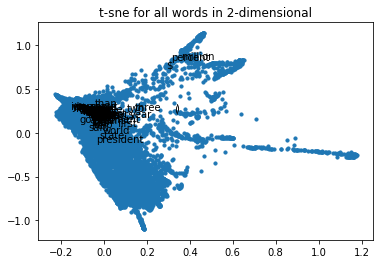

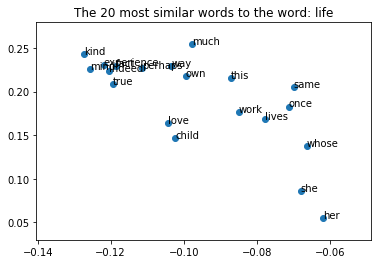

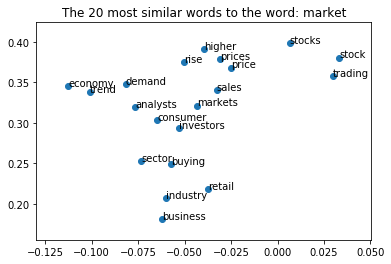

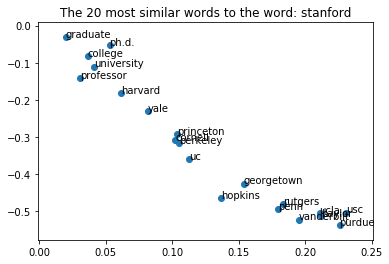

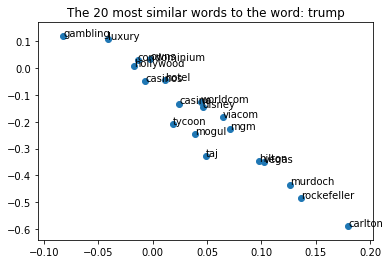

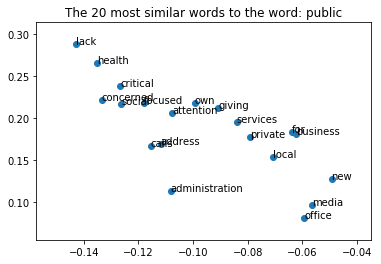

In [1]:
# Problem 3
import pandas as pd
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
%matplotlib inline

fh = open("vectors_new.txt", "r", encoding='utf-8')
word2vec = {}
all_words = []
all_word2vectors = []
for line in fh:
    split = line.split()
    word = split[0]
    values = [float(value) for value in split[1:]]
    all_words.append(word)
    all_word2vectors.append(values)
    word2vec.update({word: values})

subject_words = ['life', 'market', 'stanford', 'trump', 'public']

# Q-1 Semantics
similar_words_for_all_words = []  # list of lists where each sublist contains similar words to a subject word.
for word in subject_words:
    similarity = {}
    for key in word2vec.keys():
        similarity.update({key: 1-cosine(word2vec[word], word2vec[key])})
    sorted_similarity = sorted(similarity.items(), key=lambda x: x[1], reverse=True)

    most_similar_words = []
    for i in range(1, 21):  # Since the first similar word is the word itself, I discard it.
        most_similar_words.append(sorted_similarity[i][0])
    similar_words_for_all_words.append(most_similar_words)
    print('The 20 most similar words to the word: {} are: {}'.format(word, most_similar_words))
    print('\n')
# ===================================================================================================
# Q-2 Visualization
# To reduce the computation time, I just used 250 iteration in TSNE. 
# part (a): tsne for all words.
# In terms of word names in the plot, I just annotated the first 100 word names since showing all number of words 
# makes the figure screen totally black.
tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=30, n_iter=250)
embedded_words = tsne.fit_transform(np.array(all_word2vectors))
plt.figure(1)
ax = plt.gca()
ax.scatter(list(embedded_words[:, 0]), list(embedded_words[:, 1]), s=10)
ax.set_title('t-sne for all words in 2-dimensional')
for i, word in enumerate(all_words[:100]):
    ax.annotate(word, (embedded_words[i, 0], embedded_words[i, 1]))

# ===================================================================================================
# Part (b)
# Visualization plots of the most 20 similar words to each subjected words.
for i, word in enumerate(subject_words):
    plt.figure(i+2)
    ax = plt.gca()
    embedded_words_20 = np.zeros((20, 2))
    for j, item in enumerate(similar_words_for_all_words[i]):
        embedded_words_20[j, :] = embedded_words[all_words.index(item), :]
    ax.scatter(list(embedded_words_20[:, 0]), list(embedded_words_20[:, 1]))
    ax.set_title("The 20 most similar words to the word: %s" % word)
    for k, item1 in enumerate(similar_words_for_all_words[i]):
        ax.annotate(item1, (embedded_words_20[k, 0], embedded_words_20[k, 1]))
